# irisデータセットを回帰で判定する

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

RANDOM_SEED=71

# データの前処理

In [2]:
# 前と同じなので説明割愛

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler 

iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=RANDOM_SEED )

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/rd_bigdata01/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# モデルの学習

In [21]:
from sklearn import svm
from sklearn import linear_model
# Support Vector Regression モデルの生成
model = svm.SVR(kernel='linear', C=1000) # SVR(linear)
#model = svm.SVR(kernel='rbf', C=1000, gamma=0.1) # SVR(RBF)
#model = svm.SVR(kernel='poly', C=1000, degree=2) # SVR(POLY)
#model = linear_model.SGDRegressor(max_iter=1000) # SGD Regressor
#model = linear_model.Ridge() #Ridge回帰
#model = linear_model.Lasso() #Lasso回帰
#model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5) #ElasticNet

# モデルの学習。fit関数で行う。
model.fit(X_train_std, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# モデルの精度を評価する

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# トレーニングデータに対する精度
# 平均二乗誤差 (MSE)
pred_train = model.predict(X_train_std)
mse = mean_squared_error(y_train, pred_train)
print('トレーニングデータに対する平均二乗誤差： %.2f' % mse)
# 決定係数 (R2)
r2 = r2_score(y_train, pred_train)
print('トレーニングデータに対する寄与率： %.2f' % r2)

# テストデータに対する精度
pred_test = model.predict(X_test_std)
mse = mean_squared_error(y_test, pred_test)
print('テストデータに対する平均二乗誤差： %.2f' % mse)
# 決定係数 (R2)
r2 = r2_score(y_test, pred_test)
print('テストデータに対する寄与率： %.2f' % r2)



トレーニングデータに対する平均二乗誤差： 0.04
トレーニングデータに対する寄与率： 0.94
テストデータに対する平均二乗誤差： 0.06
テストデータに対する寄与率： 0.89


# 分類結果の可視化
* mlxtendというツールの機能を使って可視化している
* https://qiita.com/altescy/items/60a6def66f13267f6347

model : SVR


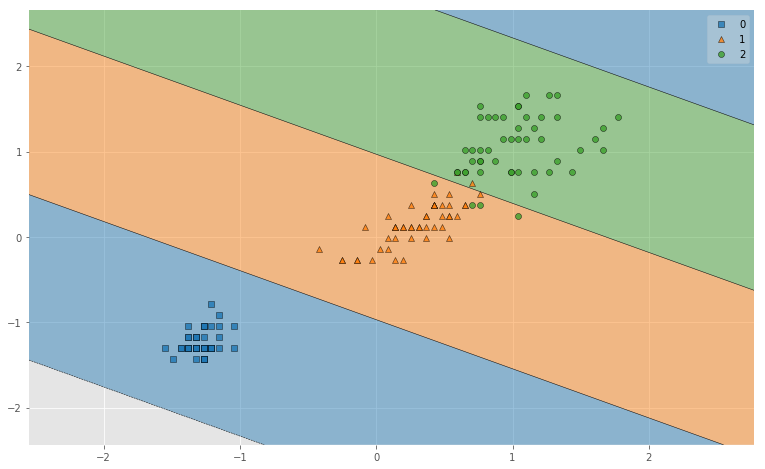

In [27]:
#分類結果を図示する
import matplotlib.pyplot as plt

# scikit-laernやmatplotlibに含まれない機能を含むPythonライブラリ
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

#配列データの結合（教師データ＋試験データ）
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 可視化
fig = plt.figure(figsize=(13,8))

# model名の取得
# <class 'sklearn.linear_model.logistic.LogisticRegression'>
# -> LogisticRegression
model_title = str(type(model)).split(".")[-1][:-2]#[:-len("Classifier")]
print("model : " + model_title)

# 分類器の決定境界を引いてくれる神機能(mlxtendに含まれる機能の１つ)
# データとターゲット，分類器を渡すだけで描いてくれる
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()